# Faculdade SENAC
## Curso: Especialização em Data Science e Inteligência Artificial
## Disciplina: Linguagem Python

## Aluno: Thiago Henrique Maia
## Matricula: 2024.15.409

# Projeto de análise de um DataSet
### Objetivos do projeto
* 0º Contextualizar o DataSet (Apresentar uma explicação do objetivo do dataset: detalhar as colunas)

* 1º Carregar dataset (Realizar carga de um arquivo csv. Pode-se utilizar a biblioteca pandas)

* 2º Realizar tratamento de colunas e linhas (Verificar se existem colunas inválidas e linhas inválidas)

* 3º Realizar análise gráfica dos dados (Pode-se utilizar as bibliotecas matplotlib ou seaborn)

* 4º Separar os arquivos de treino e teste (Separar os arquivos em treino 70 % e teste 30 %)

# Introdução
* Com o objetivo de implementar todas as funções e bibliotecas apresentatas em sala de aula, fiz uma busca no site www.kaggle.com por um DataSet que melhor se enquadrasse.

* Foi escolhido um DataSet com informações de Suicídios entre 2010 e 2019 no Brasil, por ser um tema muito sensível procurei abordar somente as informações pertinentes ao projeto. Mas essa análise traz também uma preocupação com esse tema, principalmente na taxa de suicídios entre jovens.

# Instalando as bibliotecas necessárias:
* Pandas
* Matplotlib
* Seaborn
* Numpy
* Plotly


In [6]:
! pip install pandas
! pip install matplotlib
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [7]:
! pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [8]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 2.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.0 MB 2.6 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.0 MB 2.4 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.0 MB 2.6 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.0 MB 2.6 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.0 MB 2.6 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.0 MB 2.0 MB/s eta 0:00:04
   ----------- -------------------------

# Verificando as biliotecas instaladas

In [9]:
! pip freeze

asttokens==2.4.1
colorama==0.4.6
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
debugpy==1.8.2
decorator==5.1.1
executing==2.0.1
fonttools==4.53.1
ipykernel==6.29.5
ipython==8.26.0
jedi==0.19.1
joblib==1.4.2
jupyter_client==8.6.2
jupyter_core==5.7.2
kiwisolver==1.4.7
matplotlib==3.9.2
matplotlib-inline==0.1.7
nest-asyncio==1.6.0
numpy==2.0.0
packaging==24.1
pandas==2.2.2
parso==0.8.4
pillow==10.4.0
platformdirs==4.2.2
plotly==5.24.1
prompt_toolkit==3.0.47
psutil==6.0.0
pure-eval==0.2.2
Pygments==2.18.0
pyparsing==3.1.4
python-dateutil==2.9.0.post0
pytz==2024.1
pywin32==306
pyzmq==26.0.3
scikit-learn==1.5.2
scipy==1.14.1
seaborn==0.13.2
six==1.16.0
stack-data==0.6.3
tenacity==9.0.0
threadpoolctl==3.5.0
tornado==6.4.1
traitlets==5.14.3
tzdata==2024.1
wcwidth==0.2.13


### Criando um aquivo requirements.txt

In [10]:
! pip freeze >> requirements.txt

# Importando as bibliotecas necessárias

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as snb
import numpy as np
import plotly.graph_objs as go
import plotly.subplots as sp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Importando o DataSet

### Foi importado o DataSet e criado um dataFrame df com todas as informações

In [12]:


df=pd.read_csv('DataSet/suicidios_2010_a_2019.csv')



C:\Users\Thiago\AppData\Local\Temp\ipykernel_4408\2126007271.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('DataSet/suicidios_2010_a_2019.csv')


### Visualizando o cabeçalho do DataFrame

In [13]:
df.head()

,Unnamed: 0,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESCMAE,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA
0,1,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,Não
1,2,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
2,3,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
3,4,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,Não
4,5,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,Não


### Detalhando as informações das colunas do DataFrame

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112491 entries, 0 to 112490
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  112491 non-null  int64 
 1   estado      112491 non-null  object
 2   ano         112491 non-null  int64 
 3   mes         112491 non-null  int64 
 4   DTOBITO     112491 non-null  object
 5   DTNASC      101633 non-null  object
 6   SEXO        112469 non-null  object
 7   RACACOR     109320 non-null  object
 8   ASSISTMED   70687 non-null   object
 9   ESCMAE      15 non-null      object
 10  ESTCIV      103791 non-null  object
 11  ESC         84327 non-null   object
 12  OCUP        60274 non-null   object
 13  CODMUNRES   112491 non-null  object
 14  CAUSABAS    112491 non-null  object
 15  CAUSABAS_O  112204 non-null  object
 16  LOCOCOR     112031 non-null  object
 17  CIRURGIA    8549 non-null    object
dtypes: int64(3), object(15)
memory usage: 15.4+ MB


### Informações sobre o DataSet
* Quantidade de colunas: 18
* Quantidade de linhas: 112491

### obs: 
* Nessa primeira análise pode-se observar que será necessário fazer um tratamento dos dados das colunas:
    * DTNASC
    * SEXO
    * RACACOR
    * ASSISTMED
    * ESCMAE
    * ESTCIV
    * ESC
    * OCUP
    * CAUSABAS_O
    * LOCOCOR
    * CIRURGIA

    * OBS: Foi observado que nessas colunas possuem dados nullos que podem atrapalhar no treinameno do modelo


# Tratamento dos dados


### Coluna ESCME
* Essa coluna apresenta as escolaridade da mãe dos casos de suicídios;
* Como é uma coluna que apresenta somente 15 informações não nullas, essa coluna será descartada para não prejudicar os restantes colunas


### Coluna CIRURGIA
* Essa coluna informa se foi realizado cirurgia no paciente;
* Como é uma coluna que apresenta somente 8549 informações não nullas, essa coluna será descartada para não prejudicar os restantes colunas;

### Coluna ASSISTMED
* Essa coluna informa se teve algum tipo de assistência médica ao paciente;
* Como é uma coluna que pode ser utilizada para análise, será atribuido aos dados nullos a informação 'não informado', para não atrapalhar na análise futura;

### Coluna OCUP
* Essa coluna informa a ocupação/emprego do paciente;
* Como é uma coluna que pode ser utilizada para análise, será atribuido aos dados nullos a informação 'não informado', para não atrapalhar na análise futura;

### Coluna ESC
* Essa coluna informa o grau de escolaridade dos pacientes;
* Como é uma coluna que pode ser utilizada para análise, foi realizado os seguintes tratamentos:
    * Realizado uma media dos dados de cada linha para receber um numero float;
    * Pego a moda (numero que mais se repete na coluna) e substituido os dados nulos pela moda

### Excluindo as colunas
### Comando: df.drop(columns=['ESCMAE','CIRURGIA'], inplace=True)
* Esse comando excluir as colunas ESCMAE e CIRURGIA do DataFrame e o parametro inplace=True faz a atualização do DataFrame

In [15]:
df.drop(columns=['ESCMAE','CIRURGIA'], inplace=True)

### Substituindo os dados nullos

#### Tratando os dados da coluna 'ASSISTMED'

In [16]:
df['ASSISTMED']=df['ASSISTMED'].fillna('nao informado')

#### Tratando os dados da coluna 'OCUP'

In [17]:
df['OCUP']=df['OCUP'].fillna('nao informado')

#### Tratando os dados da coluna 'ESC'

##### Função que gera uma média de cada linha da coluna 'ESC'
* exemplo:
    * Se tiver na coluna 1 a 3 anos,  a função soma (1+3) e divide por 2, retornando 2 como resultado
obs: A função vai ignorar os caracteres dentro da linha , como o 'A' e 'ANOS' 

In [18]:
def calcular_media_escolaridade(x):
    try:
        # Tentamos dividir os valores numéricos
        return (int(x.split()[0]) + int(x.split()[2])) / 2
    except (ValueError, IndexError):
        # Se houver erro (como no caso de 'Nenhuma'), retornamos np.nan
        return np.nan

# Aplicando a função à coluna 'ESC'


##### Chama a função e faz as alterações no DataFrame

In [19]:
df['ESC'] = df['ESC'].apply(lambda x: calcular_media_escolaridade(x) if pd.notnull(x) else np.nan)


##### Com os dados prontos, gera uma moda e substitui os dados nullos pela moda.

In [20]:
moda_esc=df['ESC'].mode()[0]
df['ESC']=df['ESC'].fillna(moda_esc)

### Ajustando a coluna 'DTNASC' e 'DTOBITO' para mostrar a idade

#### Converte as colunas para o formato datetime

##### Data de nascimento

In [21]:
from datetime import datetime

# Converter a coluna para datetime, forçando valores inválidos para NaT
df['DTNASC'] = pd.to_datetime(df['DTNASC'], format='%Y-%m-%d', errors='coerce')

# Verificar se a conversão foi bem-sucedida
df['DTNASC'].head()

0   1999-11-09
1   1985-09-23
2   1995-08-06
3   1983-12-25
4   1982-05-13
Name: DTNASC, dtype: datetime64[ns]

##### Data do óbito

In [22]:
from datetime import datetime

# Converter a coluna para datetime, forçando valores inválidos para NaT
df['DTOBITO'] = pd.to_datetime(df['DTOBITO'], format='%Y-%m-%d', errors='coerce')

# Verificar se a conversão foi bem-sucedida
print(df['DTOBITO'].head())

0   2010-01-31
1   2010-02-07
2   2010-02-19
3   2010-04-20
4   2010-07-24
Name: DTOBITO, dtype: datetime64[ns]


In [23]:
df['DTOBITO'].head()

0   2010-01-31
1   2010-02-07
2   2010-02-19
3   2010-04-20
4   2010-07-24
Name: DTOBITO, dtype: datetime64[ns]

### Função que calcula a idade usando como referência a data do óbito, se a data do óbito for invalida usa a data atual

In [24]:
from datetime import datetime

# Calcular a idade com base na data de óbito
def calcular_idade(data_nascimento, data_obito):
    if pd.isnull(data_obito):  # Se a data de óbito for NaN, usar a data atual
        data_obito = datetime.now()
    idade = data_obito.year - data_nascimento.year - ((data_obito.month, data_obito.day) < (data_nascimento.month, data_nascimento.day))
    return idade

# Aplicar a função para calcular a idade
df['idade'] = df.apply(lambda row: calcular_idade(row['DTNASC'], row['DTOBITO']), axis=1)

# Verificar as primeiras linhas após o cálculo da idade
print(df[['DTNASC', 'DTOBITO', 'idade']].head())


      DTNASC    DTOBITO  idade
0 1999-11-09 2010-01-31   10.0
1 1985-09-23 2010-02-07   24.0
2 1995-08-06 2010-02-19   14.0
3 1983-12-25 2010-04-20   26.0
4 1982-05-13 2010-07-24   28.0


In [25]:
df.drop(columns=['DTNASC'], inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112491 entries, 0 to 112490
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  112491 non-null  int64         
 1   estado      112491 non-null  object        
 2   ano         112491 non-null  int64         
 3   mes         112491 non-null  int64         
 4   DTOBITO     112491 non-null  datetime64[ns]
 5   SEXO        112469 non-null  object        
 6   RACACOR     109320 non-null  object        
 7   ASSISTMED   112491 non-null  object        
 8   ESTCIV      103791 non-null  object        
 9   ESC         112491 non-null  float64       
 10  OCUP        112491 non-null  object        
 11  CODMUNRES   112491 non-null  object        
 12  CAUSABAS    112491 non-null  object        
 13  CAUSABAS_O  112204 non-null  object        
 14  LOCOCOR     112031 non-null  object        
 15  idade       100749 non-null  float64       
dtypes:

### Ajustando os dados da coluna  'ESTCIV' = estado civil
* Remover os caracteres que estão /a e substituir por (a)

In [27]:
df['ESTCIV'] = df['ESTCIV'].replace(r'/a', '(a)',regex=True)
df['ESTCIV']

0         Solteiro(a)
1         Solteiro(a)
2         Solteiro(a)
3           Casado(a)
4           Casado(a)
             ...     
112486    Solteiro(a)
112487    Solteiro(a)
112488      Casado(a)
112489      Casado(a)
112490    Solteiro(a)
Name: ESTCIV, Length: 112491, dtype: object

### Remove os dados duplicados e remove as linhas que tenham informações nulas

In [28]:

df.drop_duplicates()
df.dropna(inplace=True)

# Resultado do DataFrame apos os tratamentos

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90910 entries, 0 to 112490
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  90910 non-null  int64         
 1   estado      90910 non-null  object        
 2   ano         90910 non-null  int64         
 3   mes         90910 non-null  int64         
 4   DTOBITO     90910 non-null  datetime64[ns]
 5   SEXO        90910 non-null  object        
 6   RACACOR     90910 non-null  object        
 7   ASSISTMED   90910 non-null  object        
 8   ESTCIV      90910 non-null  object        
 9   ESC         90910 non-null  float64       
 10  OCUP        90910 non-null  object        
 11  CODMUNRES   90910 non-null  object        
 12  CAUSABAS    90910 non-null  object        
 13  CAUSABAS_O  90910 non-null  object        
 14  LOCOCOR     90910 non-null  object        
 15  idade       90910 non-null  float64       
dtypes: datetime64[ns](1), floa

# Gerando os gráficos para análise dos dados

### Gera um grafico pizza
* Usa como referência a coluna 'SEXO' do dataFrame
* Objetivo:
    * Verificar a incidencia dos casos de suicídios por SEXO

In [30]:
sexo=df['SEXO'].value_counts()
sexo

SEXO
Masculino    71257
Feminino     19653
Name: count, dtype: int64

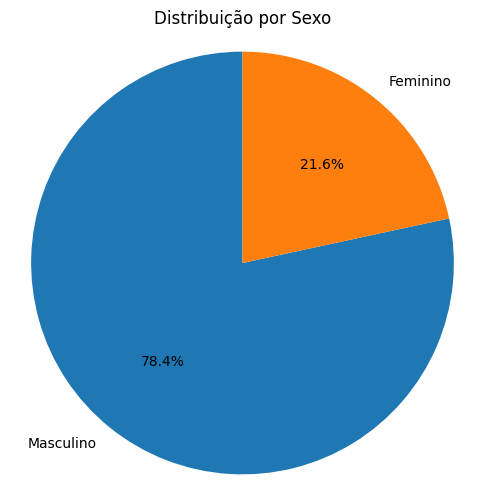

In [31]:
# Gerando o gráfico de pizza
plt.figure(figsize=(6, 6))  # Tamanho do gráfico
plt.pie(sexo, labels=sexo.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição por Sexo')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.show()

### Gera um grafico linha
* Usa como referência a coluna 'ANO' do dataFrame
* Objetivo:
    * Verificar a incidencia dos casos de suicídios por ano

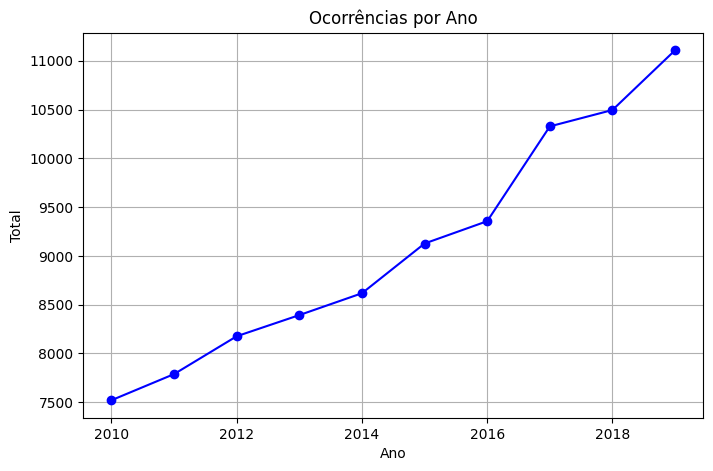

In [32]:

anos = df['ano'].value_counts().sort_index()  # Conta as ocorrências e ordena por ano

# Gerando o gráfico de linha
plt.figure(figsize=(8, 5))  # Define o tamanho do gráfico
plt.plot(anos.index, anos.values, marker='o', linestyle='-', color='b')

# Configurando o título e os rótulos dos eixos
plt.title('Ocorrências por Ano')
plt.xlabel('Ano')
plt.ylabel('Total')

# Exibindo o gráfico
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.show()


### Gera um grafico linha
* Usa como referência a coluna 'SEXO' E 'ANO' do dataFrame
* Objetivo:
    * Verificar a incidencia dos casos de suicídios por SEXO detalhando por cada ANO

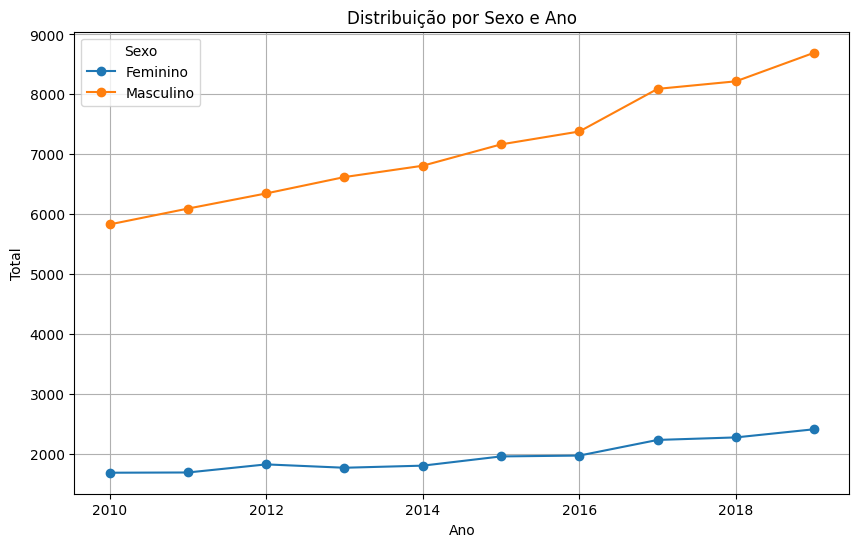

In [33]:

agrupado = df.groupby(['SEXO', 'ano']).size().unstack()  # Agrupa por 'SEXO' e 'ano' e reorganiza em tabela
# Gerando o gráfico de linha
plt.figure(figsize=(10, 6))  # Tamanho do gráfico

# Criando uma linha para cada valor de 'SEXO'
for sexo in agrupado.index:
    plt.plot(agrupado.columns, agrupado.loc[sexo], marker='o', label=sexo)

# Configurando o título e os rótulos
plt.title('Distribuição por Sexo e Ano')
plt.xlabel('Ano')
plt.ylabel('Total')
plt.legend(title='Sexo')  # Exibe uma legenda para indicar os valores de 'SEXO'

# Exibindo o gráfico
plt.grid(True)
plt.show()


### Gera um grafico COLUNA
* Usa como referência a coluna 'RACACOR' do dataFrame
* Objetivo:
    * Verificar a incidencia dos casos de suicídios por RAÇA/COR

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4408\1836774989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snb.barplot(x=contagem_racacor.index, y=contagem_racacor.values, palette='viridis')


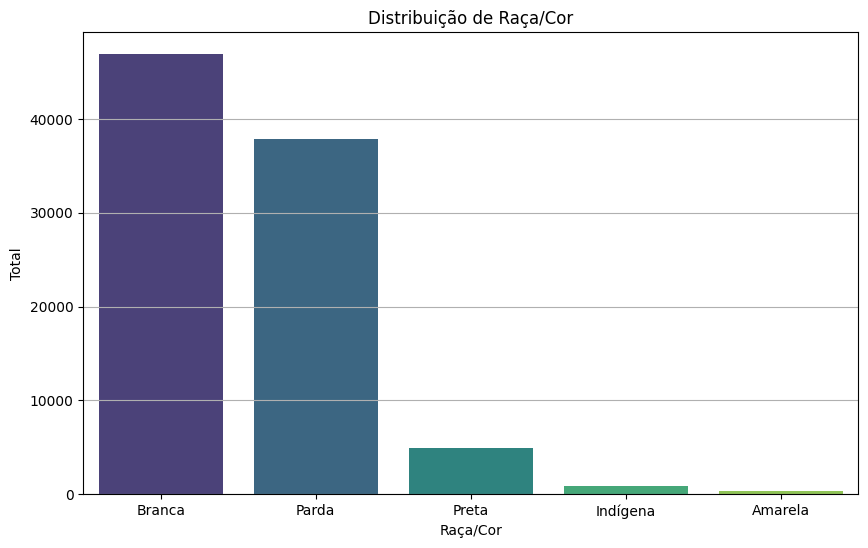

In [34]:
# Contar as ocorrências de cada valor em 'RACACOR'
contagem_racacor = df['RACACOR'].value_counts()

# Criar o gráfico de barras com Seaborn
plt.figure(figsize=(10, 6))  # Tamanho do gráfico

# Usar Seaborn para criar o gráfico de barras
snb.barplot(x=contagem_racacor.index, y=contagem_racacor.values, palette='viridis')

# Configurar o título e os rótulos
plt.title('Distribuição de Raça/Cor')
plt.xlabel('Raça/Cor')
plt.ylabel('Total')

# Exibir o gráfico
plt.grid(axis='y')  # Adiciona uma grade horizontal
plt.show()


### Gera um grafico PIZZA
* Usa como referência a coluna 'ESTCIV' do dataFrame
* Objetivo:
    * Verificar a incidencia dos casos de suicídios por ESTADO CIVIL

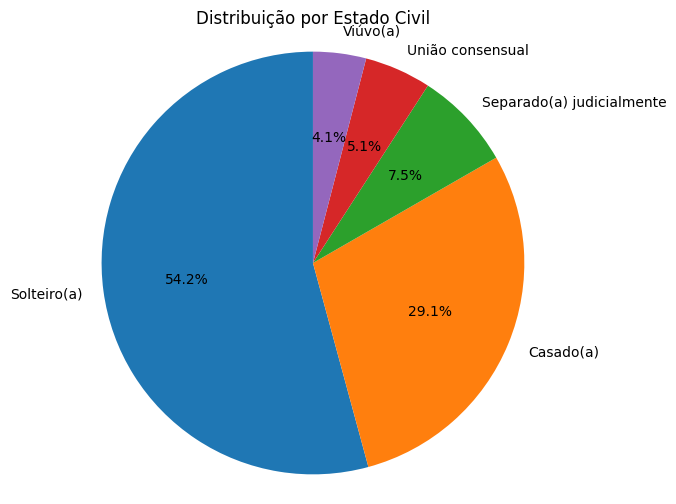

In [35]:
estado_civil=df['ESTCIV'].value_counts()

plt.figure(figsize=(6, 6))  # Tamanho do gráfico
plt.pie(estado_civil, labels=estado_civil.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição por Estado Civil')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.show()

### Gera um grafico BARRAS
* Usa como referência a coluna 'idade' do dataFrame
* Objetivo:
    * Verificar a incidencia dos casos de suicídios por IDADE

In [36]:
df['idade'].describe()

count    90910.000000
mean        41.087416
std         20.032099
min       -190.000000
25%         27.000000
50%         39.000000
75%         53.000000
max        112.000000
Name: idade, dtype: float64

In [37]:
df['idade'].sort_values(ascending=True).tail(50)

36523      96.0
15401      96.0
10267      96.0
108195     96.0
104540     96.0
94988      96.0
97587      96.0
62029      96.0
68548      96.0
96828      96.0
17212      96.0
22412      96.0
21083      96.0
58324      96.0
1792       96.0
87083      97.0
69169      97.0
38123      97.0
61412      97.0
34975      97.0
36742      97.0
71442      98.0
64998      98.0
6203       98.0
85954      98.0
83178      98.0
5087       98.0
87971      98.0
44087      98.0
50831      98.0
63821      99.0
54491      99.0
98203      99.0
36364      99.0
91751      99.0
28724      99.0
56748     100.0
73600     100.0
69897     101.0
36819     101.0
82274     101.0
88924     101.0
112446    102.0
86973     102.0
51548     103.0
78553     103.0
81707     103.0
86048     104.0
80254     112.0
60166     112.0
Name: idade, dtype: float64

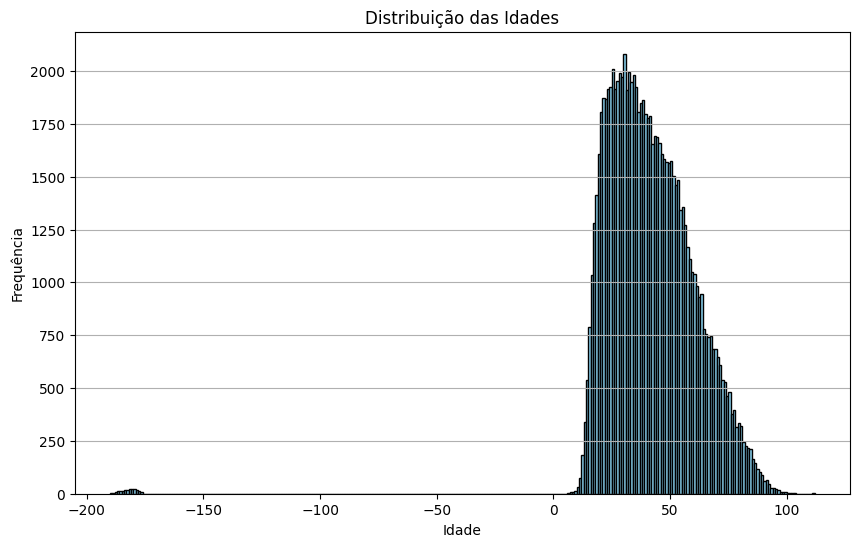

In [38]:
# Supondo que você já tenha uma coluna 'idade' calculada a partir de 'DTNASC'
idade = df['idade']

# Criando o histograma
plt.figure(figsize=(10, 6))
plt.hist(idade, bins=range(int(idade.min()), int(idade.max()) + 1, 1), color='skyblue', edgecolor='black')

# Configurando o título e os rótulos
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.grid(axis='y')
plt.show()

#### Foi observado alguns dados digitados errados
##### Tratamento
* Fazendo um filtro com as idades entre 0 e 110

#### Atualizando o DataFrame para remover as linhas que contenham idades inconsistentes

In [39]:
# Supondo que a coluna 'idade' já esteja presente no DataFrame
df = df.loc[(df['idade'] >= 0) & (df['idade'] <= 110)]

# Verificar as primeiras linhas do DataFrame após o filtro
df['idade'].describe()

count    90722.000000
mean        41.544058
std         17.302304
min          4.000000
25%         28.000000
50%         39.000000
75%         53.000000
max        104.000000
Name: idade, dtype: float64

### Como Ficou o DataFrame

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90722 entries, 0 to 112490
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  90722 non-null  int64         
 1   estado      90722 non-null  object        
 2   ano         90722 non-null  int64         
 3   mes         90722 non-null  int64         
 4   DTOBITO     90722 non-null  datetime64[ns]
 5   SEXO        90722 non-null  object        
 6   RACACOR     90722 non-null  object        
 7   ASSISTMED   90722 non-null  object        
 8   ESTCIV      90722 non-null  object        
 9   ESC         90722 non-null  float64       
 10  OCUP        90722 non-null  object        
 11  CODMUNRES   90722 non-null  object        
 12  CAUSABAS    90722 non-null  object        
 13  CAUSABAS_O  90722 non-null  object        
 14  LOCOCOR     90722 non-null  object        
 15  idade       90722 non-null  float64       
dtypes: datetime64[ns](1), floa

#### Gera o grafico BARRAS da coluna idade depois dos ajustes


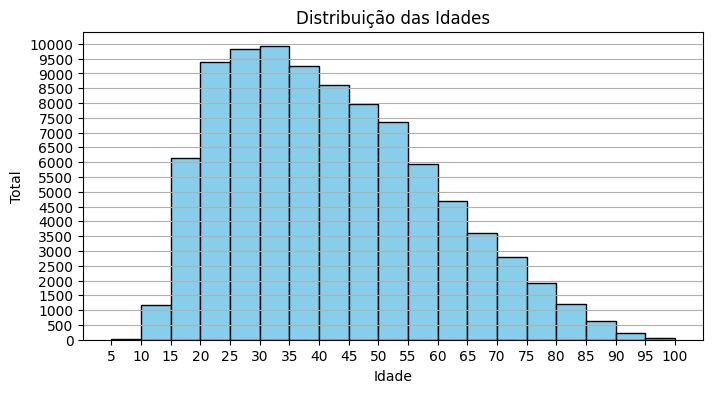

In [41]:
idade = df['idade']

# Definir o intervalo de 5 anos para os bins
intervalo_bins = range(5, 101, 5)  # De 0 a 100 anos com intervalos de 5 anos

# Criar a figura com tamanho 8x4 polegadas
plt.figure(figsize=(8, 4))

# Criar o histograma
plt.hist(idade, bins=intervalo_bins, color='skyblue', edgecolor='black')

# Configurar o título e os rótulos
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Total')

# Ajustar os ticks do eixo x para mostrar intervalos de 5 anos
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500))
# Configurar o grid
plt.grid(axis='y')

# Exibir o gráfico
plt.show()


### Gera um grafico BARRAS usando storyTelling
* Usa como referência a coluna 'idade' do dataFrame
* Objetivo:
    * Verificar a incidencia dos casos de suicídios por IDADE 
    * Destacar as idades com maior incidencia
    * Destacar os casos entre jovens de 15 a 30 anos

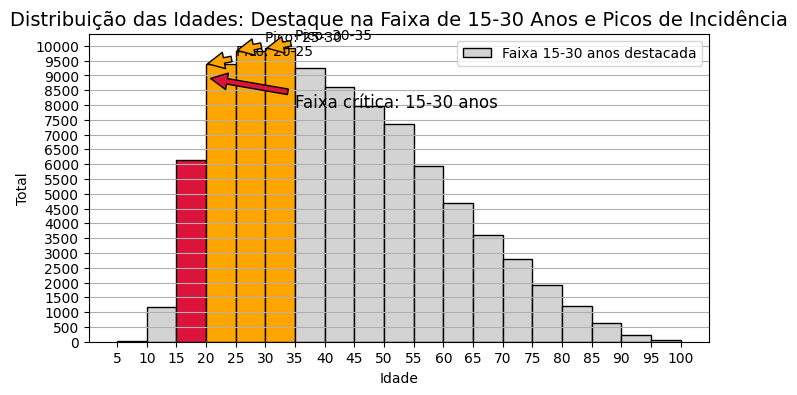

In [42]:


idade = df['idade']

# Definir o intervalo de 5 anos para os bins
intervalo_bins = range(5, 101, 5)  # De 5 a 100 anos com intervalos de 5 anos

# Criar a figura com tamanho 8x4 polegadas
plt.figure(figsize=(8, 4))

# Criar o histograma
n, bins, patches = plt.hist(idade, bins=intervalo_bins, color='lightgray', edgecolor='black')

# Realçar a faixa etária de 15 a 30 anos
for i in range(len(bins)-1):
    if 15 <= bins[i] < 30:
        patches[i].set_facecolor('crimson')  # Destaque em vermelho

# Identificar as idades com maior incidência (top 3 picos)
max_indices = np.argsort(n)[-3:]  # Índices dos 3 maiores valores
for i in max_indices:
    patches[i].set_facecolor('orange')  # Destaque em laranja

# Configurar o título e os rótulos
plt.title('Distribuição das Idades: Destaque na Faixa de 15-30 Anos e Picos de Incidência', fontsize=14)
plt.xlabel('Idade')
plt.ylabel('Total')

# Ajustar os ticks do eixo x para mostrar intervalos de 5 anos
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500))

# Adicionar uma anotação para destacar o intervalo de 15 a 30 anos
plt.annotate('Faixa crítica: 15-30 anos', xy=(20, max(n) * 0.9), xytext=(35, max(n) * 0.8),
             arrowprops=dict(facecolor='crimson', shrink=0.05),
             fontsize=12, color='black')

# Adicionar uma anotação para os picos de incidência
for i in max_indices:
    plt.annotate(f'Pico: {int(bins[i])}-{int(bins[i+1])}', xy=(bins[i], n[i]), xytext=(bins[i]+5, n[i] + 300),
                 arrowprops=dict(facecolor='orange', shrink=0.05), fontsize=10, color='black')

# Configurar o grid
plt.grid(axis='y')

# Adicionar uma legenda explicando o destaque
plt.legend(['Faixa 15-30 anos destacada', 'Maiores incidências'], loc='upper right')

# Exibir o gráfico
plt.show()


# Juntando os graficos utilizando subplots

In [43]:
def insere_grafico_pizza (dados,axes,titulo,i,j):
  
    axes[i, j].pie(dados, autopct='%1.1f%%', startangle=90,pctdistance=1.2)
    axes[i, j].set_title(titulo,loc="left")
    axes[i, j].axis('equal')  # Para garantir que o gráfico seja um círculo
    axes[i, j].legend(dados.index, title="Legenda", loc="lower left", bbox_to_anchor=(-0.1, 0), fontsize='small')
    return axes
def insere_grafico_linha(axes,agrupado,titulo,i,j,xlabel,ylabel,legenda):
    for sexo in agrupado.index:
        axes[0, 1].plot(agrupado.columns, agrupado.loc[sexo], marker='o', label=sexo)
    axes[0, 1].set_title(titulo)
    axes[0, 1].set_xlabel(xlabel)
    axes[0, 1].set_ylabel(ylabel)
    axes[0, 1].legend(title=legenda)
    axes[0, 1].grid(True)
    return axes

def insere_grafico_barras(axes,contagem_racacor,i,j,titulo,xlabel,ylabel,paleta):
    snb.barplot(x=contagem_racacor.index, y=contagem_racacor.values, palette=paleta, ax=axes[i, j])
    axes[i, j].set_title(titulo)
    axes[i, j].set_xlabel(xlabel)
    axes[i, j].set_ylabel(ylabel)
    axes[i, j].grid(axis='y')
    return axes



def insere_grafico_histograma(axes, idade, i, j):
    intervalo_bins = range(5, 101, 5)
    n, bins, patches = axes[i, j].hist(idade, bins=intervalo_bins, color='lightblue', edgecolor='black', rwidth=0.6)

    for k in range(len(bins)-1):
        if 10 <= bins[k] < 35:
            patches[k].set_facecolor('crimson')
        else:
            patches[k].set_facecolor('darkblue')

    axes[i, j].set_title('Distribuição das Idades: Destaques e Picos de Incidência', fontsize=14)
    axes[i, j].set_xlabel('Idade', fontsize=12)
    axes[i, j].set_ylabel('Total', fontsize=12)
    axes[i, j].set_ylim(0, 12000)  # Ajuste do limite do eixo y
    axes[i, j].xaxis.set_major_locator(ticker.MultipleLocator(5))
    axes[i, j].yaxis.set_major_locator(ticker.MultipleLocator(1000))

    for rect, label in zip(patches, n):
        height = rect.get_height()
        axes[i, j].text(rect.get_x() + rect.get_width() / 2, height, f'{int(label)}', ha='center', va='bottom', fontsize=10, color='black')

    handles = [plt.Line2D([0], [0], color='crimson', lw=4),
               plt.Line2D([0], [0], color='darkblue', lw=4)]
    labels = ['Faixa 10-35 anos destacada', 'Outras faixas etárias']
    axes[i, j].legend(handles=handles, labels=labels, loc='upper right', fontsize='small', title='Legenda', title_fontsize='small')

    axes[i, j].grid(axis='y', linestyle='--', alpha=0.7)

    return axes

C:\Users\Thiago\AppData\Local\Temp\ipykernel_4408\743636373.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snb.barplot(x=contagem_racacor.index, y=contagem_racacor.values, palette=paleta, ax=axes[i, j])


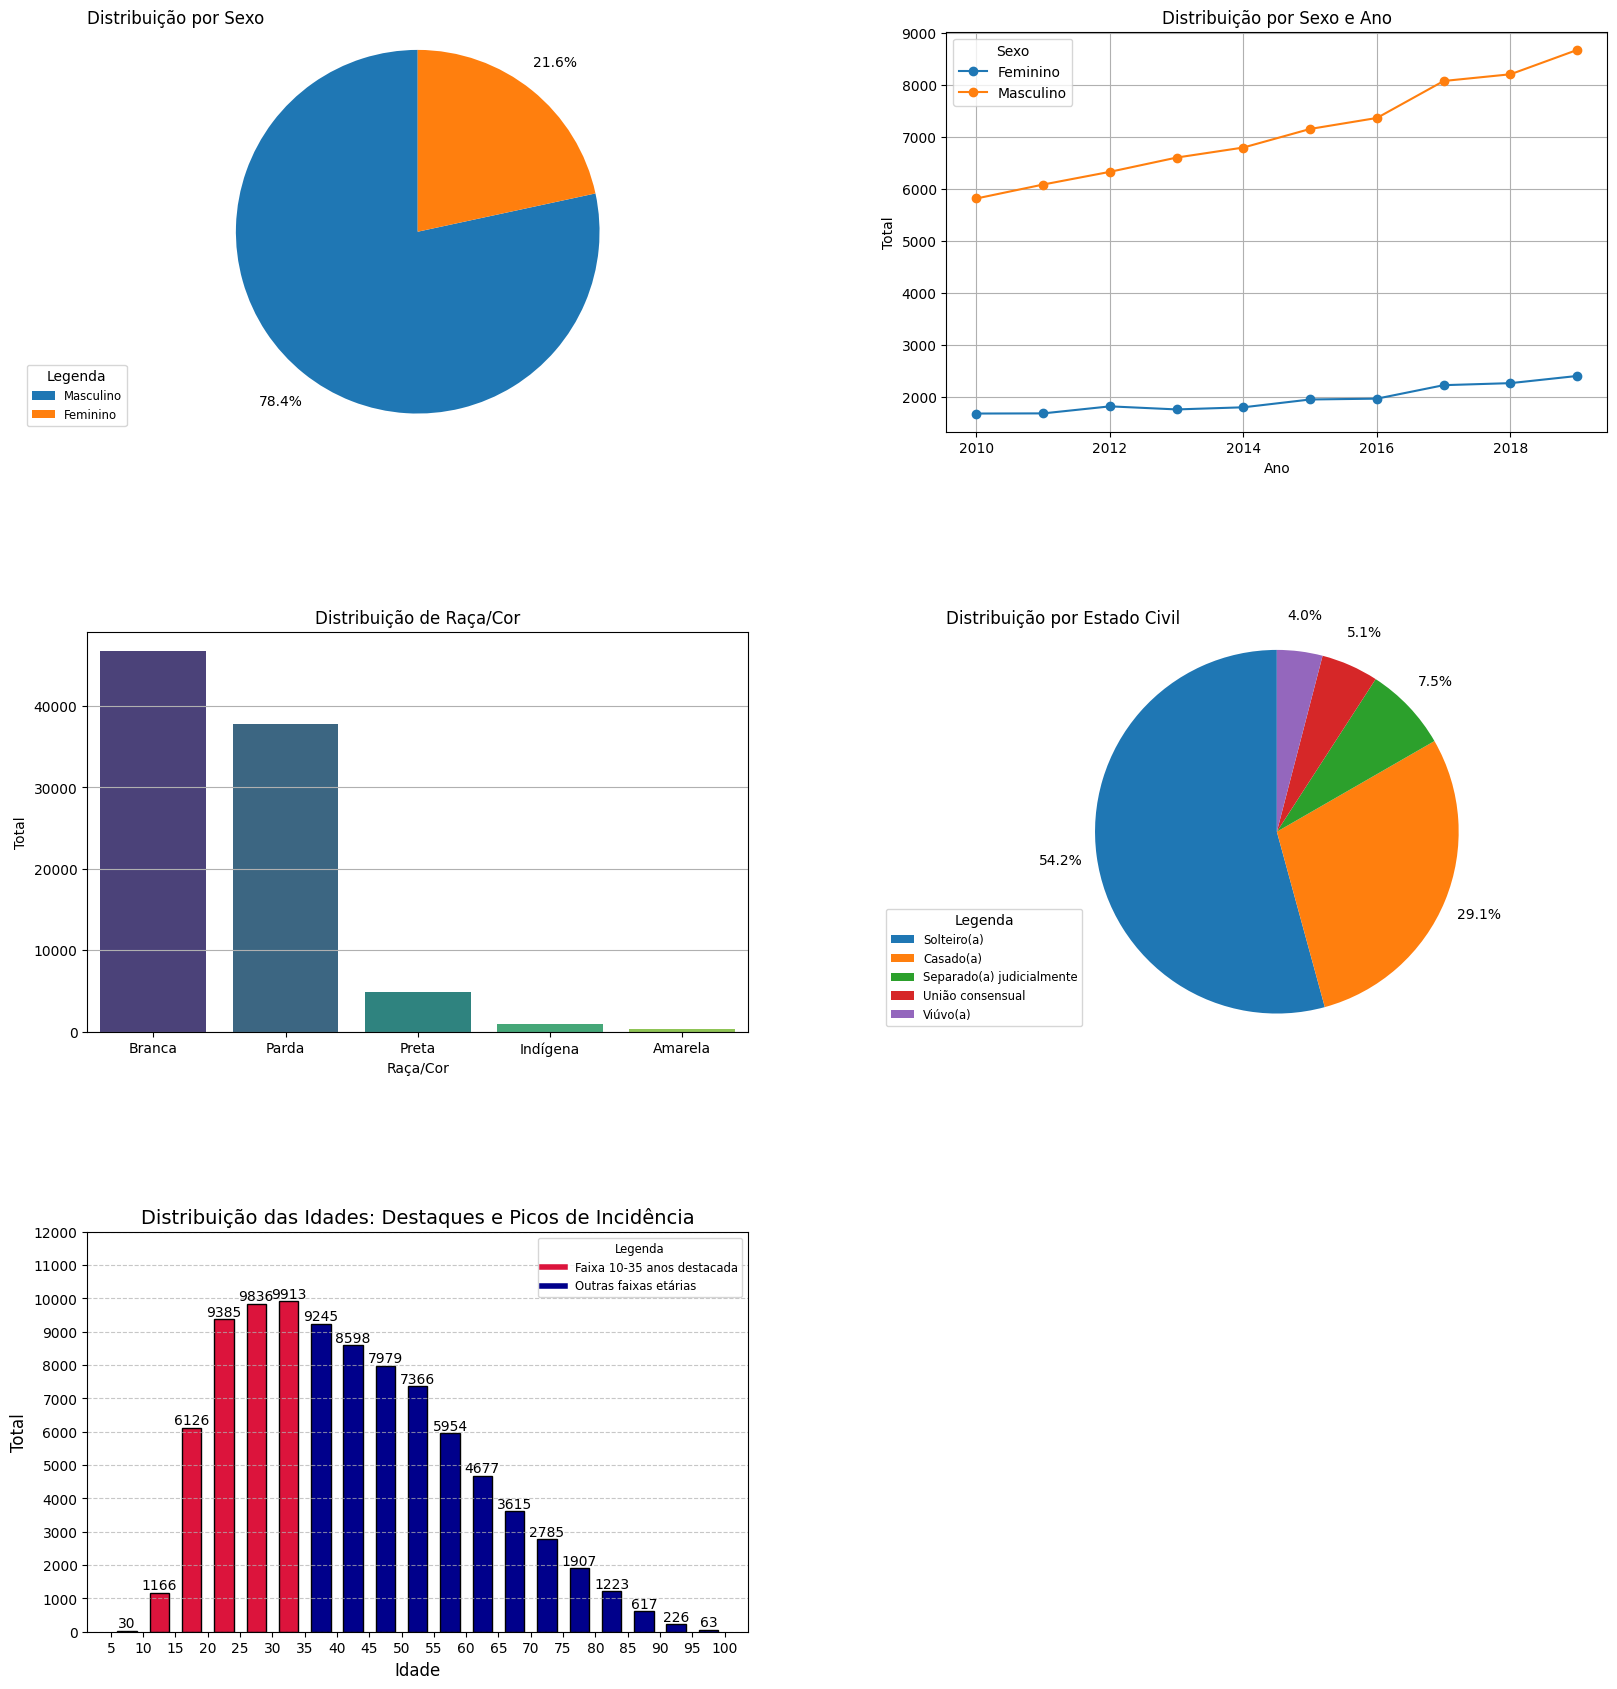

In [44]:
def gera_subplot(df):
    
    # Criar uma figura com subplots 3x2 (3 linhas, 2 colunas)
    fig, axes = plt.subplots(3, 2, figsize=(19, 20))

# Ajustar espaçamento entre os subplots
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.5)

    # Gráfico de pizza - Distribuição por Sexo
    axes=insere_grafico_pizza( df['SEXO'].value_counts(),axes,'Distribuição por Sexo',0,0)
    
    # Gráfico de linha - Distribuição por Sexo e Ano
    axes=insere_grafico_linha(axes,df.groupby(['SEXO', 'ano']).size().unstack(),'Distribuição por Sexo e Ano',0,1,'Ano','Total','Sexo')

    # Gráfico de barras - Distribuição de Raça/Cor
    axes=insere_grafico_barras(axes,df['RACACOR'].value_counts(),1,0,'Distribuição de Raça/Cor','Raça/Cor','Total','viridis')
   
    # Gráfico de pizza - Distribuição por Estado Civil
    axes=insere_grafico_pizza(df['ESTCIV'].value_counts(),axes,'Distribuição por Estado Civil',1,1)


    # Histograma - Distribuição das Idades com destaque
    axes=insere_grafico_histograma(axes,df['idade'],2,0)
   
    # Remover o último subplot (vazio)
    axes[2, 1].remove()

    # Exibir todos os gráficos em uma única figura
    plt.show()

gera_subplot(df)

# Gerando um grafico iterativo usando a biblioteca Plotly 

In [54]:
import plotly.io as pio
pio.renderers.default = 'browser'  # Ou 'notebook', 'notebook_connected', 'colab' dependendo do ambiente


In [55]:
def gera_grafico_iterativo(df):
    # Criando a figura de subplots (3x2) para compatibilidade com gráficos de pizza
    fig = sp.make_subplots(
        rows=3, cols=2,
        subplot_titles=("Distribuição por Sexo", "Distribuição por Sexo e Ano",
                        "Distribuição de Raça/Cor", "Distribuição por Estado Civil",
                        "Distribuição de Idades"),
        specs=[[{'type': 'pie'}, {'type': 'xy'}],
               [{'type': 'bar'}, {'type': 'pie'}],
               [{'type': 'bar'}, {'type': 'xy'}]]
    )

    # Gráfico de pizza - Distribuição por Sexo
    sexo_counts = df['SEXO'].value_counts()
    fig.add_trace(go.Pie(labels=sexo_counts.index, values=sexo_counts.values, hole=.3), row=1, col=1)

    # Gráfico de linha - Distribuição por Sexo e Ano
    agrupado = df.groupby(['SEXO', 'ano']).size().unstack()
    for sexo in agrupado.index:
        fig.add_trace(go.Scatter(x=agrupado.columns, y=agrupado.loc[sexo], mode='lines+markers', name=sexo), row=1, col=2)

    # Gráfico de barras - Distribuição de Raça/Cor
    racacor_counts = df['RACACOR'].value_counts()
    fig.add_trace(go.Bar(x=racacor_counts.index, y=racacor_counts.values, marker=dict(color=racacor_counts.values, colorscale='Viridis')), row=2, col=1)

    # Gráfico de pizza - Distribuição por Estado Civil
    estciv_counts = df['ESTCIV'].value_counts()
    fig.add_trace(go.Pie(labels=estciv_counts.index, values=estciv_counts.values, hole=.3), row=2, col=2)

    # Histograma - Distribuição de Idades com destaque
    idade = df['idade']
    intervalo_bins = range(5, 101, 5)
    n, bins = np.histogram(idade, bins=intervalo_bins)  # Calcular o histograma com numpy
    hist_data = pd.Series(n, index=[f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)])

    # Destacar faixa de 10-35 anos
    colors = ['darkblue'] * len(hist_data)  # Cor inicial padrão para todas as barras
    for i, bin_range in enumerate(hist_data.index):
        start_age = int(bin_range.split('-')[0])
        if 10 <= start_age < 35:
            colors[i] = 'crimson'  # Destaca a faixa de idade entre 10 e 35 anos

    # Adicionar o histograma ao gráfico
    fig.add_trace(go.Bar(
        x=hist_data.index,
        y=hist_data.values,
        marker=dict(color=colors, line=dict(color='black', width=1)),
        text=[f'{int(value)}' for value in hist_data.values],  # Rótulo com os valores
        textposition='auto'
    ), row=3, col=1)

    # Layout e ajustes
    fig.update_layout(height=900, width=1200, title_text="Visualizações dos gráficos iterativos com o Plotly", title_x=0.5, showlegend=False)
    fig.update_xaxes(title_text="Ano", row=1, col=2)
    fig.update_yaxes(title_text="Total", row=1, col=2)
    fig.update_xaxes(title_text="Raça/Cor", row=2, col=1)
    fig.update_yaxes(title_text="Total", row=2, col=1)
    fig.update_xaxes(title_text="Idade", row=3, col=1)
    fig.update_yaxes(title_text="Total", row=3, col=1, range=[0, max(hist_data.values) + 1000])  # Ajuste do limite do eixo y

    # Exibir o gráfico
    fig.show()




In [56]:
gera_grafico_iterativo(df)

# Codificando as colunas que não são números

In [57]:
def codifica_coluna(dados):
    # codifica dados não numericos em numericos

    for coluna in dados.columns:
        if dados[coluna].dtype == 'object':  # Verifica se a coluna é do tipo object
            le=LabelEncoder()
            dados[coluna]=le.fit_transform(dados[coluna])

    return dados

In [59]:
df=codifica_coluna(df)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90722 entries, 0 to 112490
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  90722 non-null  int64         
 1   estado      90722 non-null  int64         
 2   ano         90722 non-null  int64         
 3   mes         90722 non-null  int64         
 4   DTOBITO     90722 non-null  datetime64[ns]
 5   SEXO        90722 non-null  int64         
 6   RACACOR     90722 non-null  int64         
 7   ASSISTMED   90722 non-null  int64         
 8   ESTCIV      90722 non-null  int64         
 9   ESC         90722 non-null  float64       
 10  OCUP        90722 non-null  int64         
 11  CODMUNRES   90722 non-null  int64         
 12  CAUSABAS    90722 non-null  int64         
 13  CAUSABAS_O  90722 non-null  int64         
 14  LOCOCOR     90722 non-null  int64         
 15  idade       90722 non-null  float64       
dtypes: datetime64[ns](1), floa

In [61]:
df.head()

,Unnamed: 0,estado,ano,mes,DTOBITO,SEXO,RACACOR,ASSISTMED,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,idade
0,1,0,2010,1,2010-01-31,1,3,2,2,2.0,294,4636,240,406,4,10.0
1,2,0,2010,2,2010-02-07,1,3,2,2,2.0,294,4636,240,406,1,24.0
2,3,0,2010,2,2010-02-19,1,3,2,2,2.0,294,4636,240,406,1,14.0
3,4,0,2010,4,2010-04-20,0,3,2,0,2.0,237,4636,240,406,0,26.0
4,5,0,2010,7,2010-07-24,1,3,2,0,5.5,237,4636,190,355,0,28.0


# Separando os dados para treinamento do modelo
* foi usado a biblioteca sklearn
    * A função train_test_split() faz a separação dos dados retornando os 2 dataFrames
        * df_treino
        * df_teste

In [62]:

df_treino, df_teste = train_test_split(df, test_size=0.3, random_state=42)

# Verificar o tamanho dos DataFrames resultantes
print(f'Tamanho do DataFrame de Treinamento: {len(df_treino)}')
print(f'Tamanho do DataFrame de Teste: {len(df_teste)}')


Tamanho do DataFrame de Treinamento: 63505
Tamanho do DataFrame de Teste: 27217


## Dados treinamento

In [50]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63505 entries, 79011 to 20013
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  63505 non-null  int64         
 1   estado      63505 non-null  object        
 2   ano         63505 non-null  int64         
 3   mes         63505 non-null  int64         
 4   DTOBITO     63505 non-null  datetime64[ns]
 5   SEXO        63505 non-null  object        
 6   RACACOR     63505 non-null  object        
 7   ASSISTMED   63505 non-null  object        
 8   ESTCIV      63505 non-null  object        
 9   ESC         63505 non-null  float64       
 10  OCUP        63505 non-null  object        
 11  CODMUNRES   63505 non-null  object        
 12  CAUSABAS    63505 non-null  object        
 13  CAUSABAS_O  63505 non-null  object        
 14  LOCOCOR     63505 non-null  object        
 15  idade       63505 non-null  float64       
dtypes: datetime64[ns](1), f

In [63]:
df_teste.head(25)

,Unnamed: 0,estado,ano,mes,DTOBITO,SEXO,RACACOR,ASSISTMED,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,idade
44957,44958,17,2014,2,2014-02-23,1,1,0,0,5.5,598,1108,171,334,0,42.0
85212,85213,25,2017,10,2017-10-21,1,1,0,2,5.5,793,4506,259,427,0,38.0
880,881,5,2010,9,2010-09-19,1,3,2,2,2.0,793,1048,180,343,3,61.0
83485,83486,23,2017,3,2017-03-14,1,1,1,2,2.0,294,2337,171,334,3,17.0
75782,75783,8,2017,1,2017-01-01,1,3,1,0,5.5,9,1737,180,343,1,77.0
91494,91495,13,2018,11,2018-11-18,1,3,0,0,5.5,48,4060,180,343,0,72.0
76667,76668,12,2017,4,2017-04-21,1,3,0,2,9.5,318,1320,171,334,0,39.0
54047,54048,10,2015,5,2015-05-05,1,1,2,0,2.0,48,1035,151,312,1,62.0
99225,99226,2,2019,4,2019-04-07,0,1,0,2,5.5,656,2603,171,334,0,24.0
99592,99593,4,2019,10,2019-10-19,1,3,0,2,9.5,656,2265,263,431,4,33.0


## Dados para teste

In [51]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27217 entries, 44957 to 47166
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  27217 non-null  int64         
 1   estado      27217 non-null  object        
 2   ano         27217 non-null  int64         
 3   mes         27217 non-null  int64         
 4   DTOBITO     27217 non-null  datetime64[ns]
 5   SEXO        27217 non-null  object        
 6   RACACOR     27217 non-null  object        
 7   ASSISTMED   27217 non-null  object        
 8   ESTCIV      27217 non-null  object        
 9   ESC         27217 non-null  float64       
 10  OCUP        27217 non-null  object        
 11  CODMUNRES   27217 non-null  object        
 12  CAUSABAS    27217 non-null  object        
 13  CAUSABAS_O  27217 non-null  object        
 14  LOCOCOR     27217 non-null  object        
 15  idade       27217 non-null  float64       
dtypes: datetime64[ns](1), f

In [64]:
df_teste.head(25)

,Unnamed: 0,estado,ano,mes,DTOBITO,SEXO,RACACOR,ASSISTMED,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,idade
44957,44958,17,2014,2,2014-02-23,1,1,0,0,5.5,598,1108,171,334,0,42.0
85212,85213,25,2017,10,2017-10-21,1,1,0,2,5.5,793,4506,259,427,0,38.0
880,881,5,2010,9,2010-09-19,1,3,2,2,2.0,793,1048,180,343,3,61.0
83485,83486,23,2017,3,2017-03-14,1,1,1,2,2.0,294,2337,171,334,3,17.0
75782,75783,8,2017,1,2017-01-01,1,3,1,0,5.5,9,1737,180,343,1,77.0
91494,91495,13,2018,11,2018-11-18,1,3,0,0,5.5,48,4060,180,343,0,72.0
76667,76668,12,2017,4,2017-04-21,1,3,0,2,9.5,318,1320,171,334,0,39.0
54047,54048,10,2015,5,2015-05-05,1,1,2,0,2.0,48,1035,151,312,1,62.0
99225,99226,2,2019,4,2019-04-07,0,1,0,2,5.5,656,2603,171,334,0,24.0
99592,99593,4,2019,10,2019-10-19,1,3,0,2,9.5,656,2265,263,431,4,33.0
